In [1]:
import dill as pickle
import pyspi

def load_pickle(fpath):
    with open(fpath, "rb") as f:
        data = pickle.load(f)
    return data


path = "/media/dan/Data/data/connectivity/six_run/111_epoch_0000076800-0000077824/calc.pkl"
load_pickle(path)

RuntimeError: Unable to import 'infodynamics.measures.continuous.gaussian' without JVM

In [3]:
path = "/media/dan/Data/data/connectivity/additional_calculations/018_epoch_0000596992-0000598016/calc.pkl"
load_pickle(path)

spi     cov_EmpiricalCovariance                                          \
process                  proc-0    proc-1    proc-2    proc-3    proc-4   
proc-0                      NaN -0.107632  0.329183  0.278420  0.358770   
proc-1                -0.107632       NaN -0.518169 -0.710361 -0.727360   
proc-2                 0.329183 -0.518169       NaN  0.751982  0.738090   
proc-3                 0.278420 -0.710361  0.751982       NaN  0.850729   
proc-4                 0.358770 -0.727360  0.738090  0.850729       NaN   
...                         ...       ...       ...       ...       ...   
proc-85                0.036149 -0.312001  0.097754  0.090453  0.098259   
proc-86                0.006210 -0.205201  0.043148  0.046297  0.043574   
proc-87               -0.133475 -0.075468  0.001400 -0.005258 -0.008603   
proc-88                0.066998  0.026142  0.163057  0.058075  0.103402   
proc-89                0.099643 -0.004103  0.144627  0.070632  0.084948   

spi                                                        ...  \
process    proc-5    proc-6    proc-7    proc-8    proc-9  ...   
proc-0   0.365841  0.427511  0.325043  0.332811  0.400210  ...   
proc-1  -0.798275 -0.764108 -0.491435 -0.331935 -0.116728  ...   
proc-2   0.743828  0.698208  0.532600  0.393401  0.322848  ...   
proc-3   0.867921  0.805991  0.586711  0.438973  0.311657  ...   
proc-4   0.902611  0.854413  0.610898  0.474219  0.357917  ...   
...           ...       ...       ...       ...       ...  ...   
proc-85  0.148075  0.232953  0.217294  0.227426  0.126322  ...   
proc-86  0.065393  0.113734  0.132913  0.136165  0.048133  ...   
proc-87 -0.035404 -0.052888 -0.130787 -0.125852 -0.181128  ...   
proc-88  0.089879  0.072011 -0.095562 -0.091132 -0.025551  ...   
proc-89  0.089981  0.092681  0.037482  0.053394  0.055760  ...   

spi     pec_orth_log_abs                                                    \
process          proc-80   proc-81   proc-82   proc-83   proc-84   proc-85   
proc-0          0.069107  0.065885  0.118139  0.146028  0.138366  0.066567   
proc-1          0.059051  0.081161  0.194732  0.105024  0.043927  0.086303   
proc-2          0.045192  0.088773  0.106328  0.182386  0.301598  0.022392   
proc-3          0.100385  0.066437  0.161135  0.301173  0.278078  0.137352   
proc-4          0.235372  0.021995  0.093024  0.319398  0.366363  0.106986   
...                  ...       ...       ...       ...       ...       ...   
proc-85         0.109663  0.163730  0.096797  0.076640  0.150259       NaN   
proc-86         0.229556  0.133401  0.049403  0.082833  0.178002  0.057274   
proc-87         0.115431  0.052702  0.014356  0.046866  0.184278  0.028202   
proc-88         0.094641  0.222664  0.155333  0.116691  0.060188  0.006279   
proc-89         0.123163  0.105883  0.037119  0.120775  0.137231  0.018200   

spi                                              
process   proc-86   proc-87   proc-88   proc-89  
proc-0   0.339502  0.189757  0.040737  0.069854  
proc-1   0.243068  0.092195  0.090385  0.058399  
proc-2   0.126866  0.113456  0.146950  0.058717  
proc-3   0.124717  0.125409  0.039683  0.037318  
proc-4   0.067072  0.119249  0.068723  0.060745  
...           ...       ...       ...       ...  
proc-85  0.057274  0.028202  0.006279  0.018200  
proc-86       NaN  0.052608  0.024673  0.035501  
proc-87  0.052608       NaN  0.051189  0.036484  
proc-88  0.024673  0.051189       NaN  0.434588  
proc-89  0.035501  0.036484  0.434588       NaN  

[90 rows x 12240 columns]

In [22]:
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from einops import rearrange, reduce
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import pandas as pd
import os


from torchmetrics.classification import AveragePrecision, BinaryRecall, BinaryPrecision, BinaryF1Score, BinaryROC, BinaryPrecisionRecallCurve


In [23]:
path = "/media/dan/Data/data/sourcesink_As/069_000500_000500.hdf5"

In [24]:
# load the data
with h5py.File(path,'r') as f:
    print(f['data'].keys())
    data = f['data/A_mats'][()] 
    soz = f['metadata/patient_info/soz'][()]
    a_mask = f['data/A_mask'][()]

<KeysViewHDF5 ['A_mask', 'A_mats', 'A_mean', 'A_medians', 'A_thresh', 'window_indexs', 'window_reconstructionError', 'windows']>


In [25]:
data.shape

(118, 118, 601)

In [26]:
soz

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [27]:
np.where(soz == 1)

(array([ 24,  25,  26,  27,  28,  29,  64,  65,  66,  83,  84,  85,  86,
         87,  88, 100, 101, 102, 103]),)

In [28]:
data.mean(axis=2).shape

(118, 118)

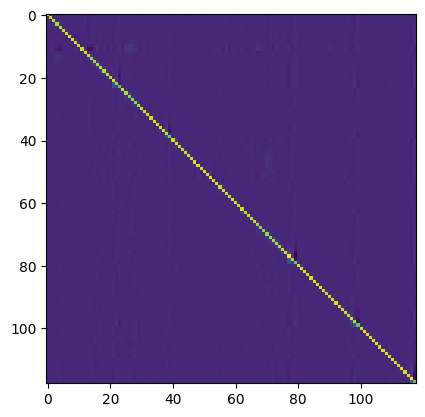

In [29]:
plt.imshow(data[...,a_mask].mean(axis=2))

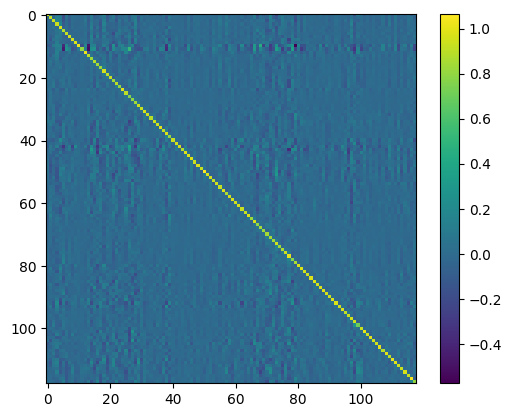

In [30]:
plt.imshow(data[:,:,0])
plt.colorbar()

In [31]:
eye = np.eye(data.shape[0])
eye = np.abs(eye - 1)
zdata = data * rearrange(eye, 'i j -> i j 1')

In [32]:
zdata.shape

(118, 118, 601)

In [33]:
def znorm(data):
    flat = rearrange(data, 'i j t -> (i j) t')
    m = np.mean(flat, axis=0)
    s = np.std(flat, axis=0)

    t = (data - m) / s
    eye = np.eye(data.shape[0])
    eye = np.abs(eye - 1)
    t = t * rearrange(eye, 'i j -> i j 1')

    return t
zdata = znorm(zdata)


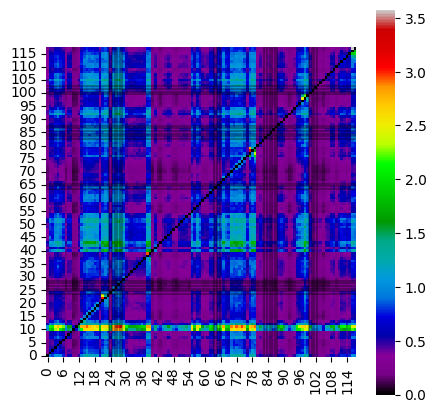

In [34]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(np.median(np.abs(zdata), axis=2), cmap='nipy_spectral', cbar=True, square=True,ax=ax)
ax.invert_yaxis()

for i,z in enumerate(soz):
    if z == 1:
        plt.axvline(x=i, color='k', alpha=0.3)
        plt.axhline(y=i, color='k', alpha=0.3)

In [35]:
def extract_rows_and_cols(matrix):
    """
    Extract and concatenate rows and columns from an n×n matrix.
    
    Parameters:
    matrix : numpy.ndarray
        An n×n matrix
        
    Returns:
    numpy.ndarray
        Array of shape (n, 2n) where each row contains the concatenated
        row and column vectors for each index
    """
    if not isinstance(matrix, np.ndarray):
        matrix = np.array(matrix)
    
    n = matrix.shape[0]
    if matrix.shape != (n, n):
        raise ValueError("Input must be a square matrix")
    
    # Initialize output array to store concatenated vectors
    result = np.zeros((n, 2*n))
    
    for i in range(n):
        # Get row i and column i
        row_i = matrix[i, :]
        col_i = matrix[:, i]
        
        # Concatenate them and store in result
        result[i] = np.concatenate([row_i, col_i])
    
    return result

In [36]:
inputs = []
for i in range(data.shape[-1]):
    inputs.extend(extract_rows_and_cols(zdata[:,:,i]))
inputs = np.array(inputs)
n = data.shape[-1]
# repeate soz n times to match inputs
labels = np.tile(soz, n).T.reshape(-1,1)


In [37]:
import torch.nn as nn
def train_node_classifier(model, graph, optimizer, criterion, n_epochs=200):

    for epoch in range(1, n_epochs + 1):
        model.train()
        optimizer.zero_grad()
        out = model(graph)
        loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])
        loss.backward()
        optimizer.step()

        pred = out.argmax(dim=1)
        acc = eval_node_classifier(model, graph, graph.val_mask)

        if epoch % 10 == 0:
            print(f'Epoch: {epoch:03d}, Train Loss: {loss:.3f}, Val Acc: {acc:.3f}')

    return model


def eval_node_classifier(model, graph, mask):

    model.eval()
    pred = model(graph).argmax(dim=1)
    correct = (pred[mask] == graph.y[mask]).sum()
    acc = int(correct) / int(mask.sum())

    return acc

In [69]:

from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')
graph = dataset[0]

import torch_geometric.transforms as T

split = T.RandomNodeSplit(num_val=0.1, num_test=0.2)
graph = split(graph)

In [64]:
from torch_geometric.utils import to_edge_index
from torch_geometric.data import Data


In [59]:
edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1]], dtype=torch.long)
edge_index.shape

torch.Size([4, 2])

In [74]:
edge_index.t().contiguous().shape

torch.Size([13924, 2])

In [75]:
edge_index, x = to_edge_index(torch.tensor(data[:,:,0]).to_sparse())

edge_index.shape

torch.Size([2, 13924])

In [79]:
graph = Data(x=x, edge_index=edge_index.contiguous(), y=torch.tensor(soz, dtype=torch.int64))
graph

Data(x=[13924], edge_index=[2, 13924], y=[118])

In [77]:
dataset.num_node_features

1433

In [78]:
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(1, 16)
        self.conv2 = GCNConv(16, 2)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        output = self.conv2(x, edge_index)

        return output
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

gcn = GCN().to(device)
optimizer_gcn = torch.optim.Adam(gcn.parameters(), lr=0.01, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()

graph = graph.to(device)
gcn = train_node_classifier(gcn, graph, optimizer_gcn, criterion)

test_acc = eval_node_classifier(gcn, graph, graph.test_mask)
print(f'Test Acc: {test_acc:.3f}')

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got -2)

In [83]:
# simple 4 layer network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        N = inputs.shape[1]
        self.fc1 = nn.Linear(N, 1, bias=False)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        return x
    
# Best model tracking class
class ModelCheckpoint:
    def __init__(self, path='v2_best_model.pth'):
        self.path = path
        self.best_loss = float('inf')
        
    def __call__(self, val_loss, model):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.save_checkpoint(model)
            return True
        return False
        
    def save_checkpoint(self, model):
        torch.save(model.state_dict(), self.path) 

        
net = Net()
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# check if gpu is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = net.to(device)

if type(inputs) == np.ndarray:
    inputs = torch.from_numpy(inputs).float().to(device)
    labels = torch.from_numpy(labels).float().to(device)


# # shuffle the data
# indices = torch.randperm(inputs.shape[0])
# inputs = inputs[indices]
# labels = labels[indices]

# Split into train (70%), validation (15%), and test (15%)
train_inputs = inputs[:int(inputs.shape[0]*0.7)]
train_labels = labels[:int(labels.shape[0]*0.7)]

temp_inputs = inputs[int(inputs.shape[0]*0.7):]
temp_labels = labels[int(labels.shape[0]*0.7):]

val_inputs = temp_inputs[:int(temp_inputs.shape[0]*0.5)]
val_labels = temp_labels[:int(temp_labels.shape[0]*0.5)]

test_inputs = temp_inputs[int(temp_inputs.shape[0]*0.5):]
test_labels = temp_labels[int(temp_labels.shape[0]*0.5):]


# Initialize model checkpoint
model_checkpoint = ModelCheckpoint()

# Training loop with validation
train_losses = []
val_losses = []

for epoch in tqdm(range(4000)):
    # Training phase
    net.train()
    optimizer.zero_grad()
    train_outputs = net(train_inputs)
    train_loss = criterion(train_outputs, train_labels)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())
    
    # Validation phase
    net.eval()
    with torch.no_grad():
        val_outputs = net(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        val_losses.append(val_loss.item())
        
        # Save model if it's the best so far
        # model_checkpoint(val_loss.item(), net)

    # # Print progress every 100 epochs
    # if epoch % 1000 == 0:
    #     print(f'Epoch {epoch}:')
    #     print(f'Training Loss: {train_loss.item():.4f}')
    #     print(f'Validation Loss: {val_loss.item():.4f}')

# # Save the final model
# torch.save(net.state_dict(), 'v2_final_model.pth')
# print('Final model saved')

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate both models
print("\nEvaluating best model:")
net.load_state_dict(torch.load('best_model.pth'))
net.eval()
with torch.no_grad():
    test_outputs = net(test_inputs)
    best_test_loss = criterion(test_outputs, test_labels)
    best_predictions = (test_outputs > 0.5).float()
    best_accuracy = (best_predictions == test_labels).float().mean()
    print(f'Best Model Test Loss: {best_test_loss.item():.4f}')
    print(f'Best Model Test Accuracy: {best_accuracy.item():.4f}')

print("\nEvaluating final model:")
net.load_state_dict(torch.load('final_model.pth'))
net.eval()
with torch.no_grad():
    test_outputs = net(test_inputs)
    final_test_loss = criterion(test_outputs, test_labels)
    final_predictions = (test_outputs > 0.5).float()
    final_accuracy = (final_predictions == test_labels).float().mean()
    print(f'Final Model Test Loss: {final_test_loss.item():.4f}')
    print(f'Final Model Test Accuracy: {final_accuracy.item():.4f}')

# Save training history
np.save('train_losses.npy', train_losses)
np.save('val_losses.npy', val_losses)

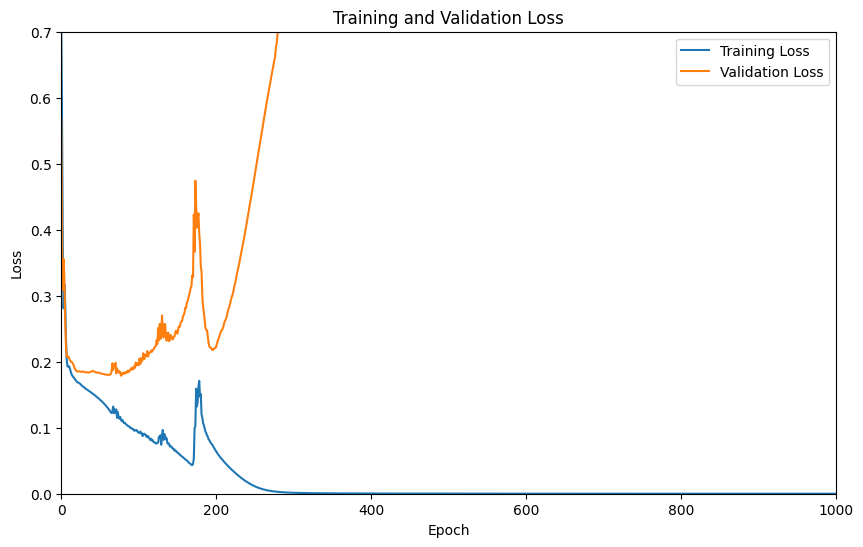

In [145]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlim(0, 1000)
plt.ylim(0, .7)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [246]:
from torchmetrics.classification import AveragePrecision, BinaryRecall, BinaryPrecision, BinaryF1Score, BinaryROC, BinaryPrecisionRecallCurve


In [2]:
average_precision = AveragePrecision(task="binary")

print("\nEvaluating best model:")
net.load_state_dict(torch.load('best_model.pth'))
net.eval()
with torch.no_grad():
    test_outputs = net(test_inputs)
    best_test_loss = criterion(test_outputs, test_labels)
    best_predictions = (test_outputs > 0.5).float()

    # precision recall curve


    best_accuracy = (best_predictions == test_labels).float().mean()
    print(f'Best Model Test Loss: {best_test_loss.item():.4f}')
    print(f'Best Model Test Accuracy: {best_accuracy.item():.4f}')

    average_precision(test_outputs,test_labels.int())


Evaluating best model:


NameError: name 'net' is not defined

In [45]:
ones = np.where(test_labels.cpu().numpy() == 1)[0]
zeros = np.where(test_labels.cpu().numpy() == 0)[0]


In [21]:
net.fc4

Linear(in_features=944, out_features=472, bias=True)

In [20]:
net.fc4.weight.data.shape

torch.Size([472, 944])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
o = test_inputs[[ones[0]],...].cpu().numpy()
o.shape

(1, 236)

In [58]:
w1 = net.fc1.weight.data.cpu().numpy() 
b1 = net.fc1.bias.data.cpu().numpy()

w2 = net.fc2.weight.data.cpu().numpy() 
b2 = net.fc2.bias.data.cpu().numpy()

w3 = net.fc3.weight.data.cpu().numpy() 
b3 = net.fc3.bias.data.cpu().numpy()

w4 = net.fc4.weight.data.cpu().numpy() 
b4 = net.fc4.bias.data.cpu().numpy()

w5 = net.fc5.weight.data.cpu().numpy() 
b5 = net.fc5.bias.data.cpu().numpy()

w6 = net.fc6.weight.data.cpu().numpy() 
b6 = net.fc6.bias.data.cpu().numpy()

In [62]:
x1 = o @ w1.T + b1
x2 = x1 @ w2.T + b2
x3 = x2 @ w3.T + b3
x4 = x3 @ w4.T + b4
x4_relu = torch.relu(torch.from_numpy(x4))
x4_relu = x4_relu.cpu().numpy()
x5 = x4_relu @ w5.T + b5
x6 = x5 @ w6.T + b6
x6_sigmoid = torch.sigmoid(torch.from_numpy(x6))
x6_sigmoid = x6_sigmoid.cpu().numpy()
x6_sigmoid.shape


(1, 1)

In [104]:
idxs = np.where(soz == 1)[0]

In [107]:
test_inputs.shape[1]

236

In [180]:
idxs = torch.where(test_labels == 1)[0]
test = test_inputs[idxs,:]
test.shape

net.load_state_dict(torch.load('final_model.pth'))
net.eval()
with torch.no_grad():
    t = net(test)

In [193]:
ec = torch.where(test == 0)[1][::2].cpu().numpy()

In [194]:
t_bool = t > 0.5
t_bool = t_bool.cpu().numpy()

<Axes: xlabel='id', ylabel='Proportion'>

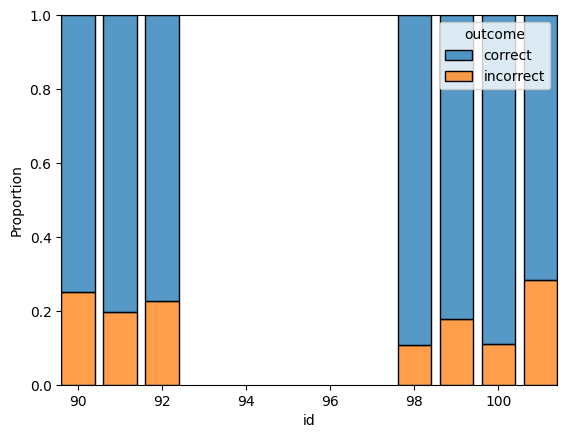

In [204]:
rows = []
for i in range(t_bool.shape[0]):
    tmp = {'id':ec[i], 'outcome':None, 'cnt':1}
    if t_bool[i]:
        tmp['outcome'] = 'correct'
    else:
        tmp['outcome'] = 'incorrect'
    rows.append(tmp)

df = pd.DataFrame(rows)
sns.histplot(
    data=df,
    x="id", hue="outcome",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8
)



In [247]:
idxs = torch.where(test_labels == 1)[0]

net.load_state_dict(torch.load('final_model.pth'))
net.eval()
with torch.no_grad():
    t = net(test_inputs)

t_bool = t > 0.5
t_bool = t_bool.cpu().numpy()
lookup = np.where(test_inputs.cpu().numpy() == 0)[1][::2]


rows = []
for i in range(t_bool.shape[0]):
    tmp = {'id':lookup[i], 'outcome':None, 'cnt':1}
    if t_bool[i] and test_labels[i] == 1:
        tmp['outcome'] = 'correct'
    elif t_bool[i] and test_labels[i] == 0:
        tmp['outcome'] = 'incorrect'
    elif not t_bool[i] and test_labels[i] == 1:
        tmp['outcome'] = 'incorrect'
    elif not t_bool[i] and test_labels[i] == 0:
        tmp['outcome'] = 'correct'
    rows.append(tmp)
df = pd.DataFrame(rows)


print(f"average_precision: {average_precision(t,test_labels.int())}")


average_precision: 0.8126726150512695


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'BinaryPrecisionRecallCurve'}, xlabel='Recall', ylabel='Precision'>)

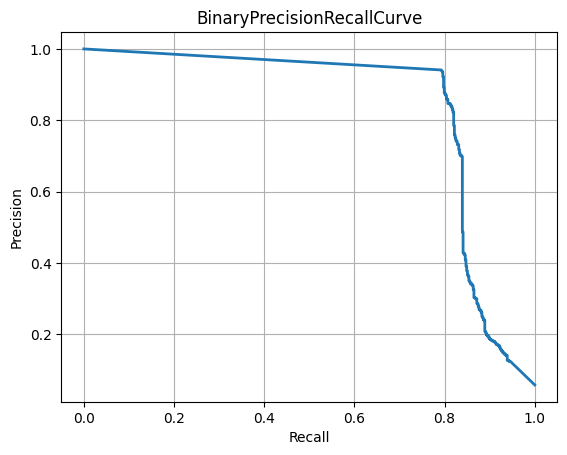

In [251]:
pr_curve = BinaryPrecisionRecallCurve()
pr_curve.update(t,test_labels.int())
pr_curve.plot()

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'BinaryROC'}, xlabel='False positive rate', ylabel='True positive rate'>)

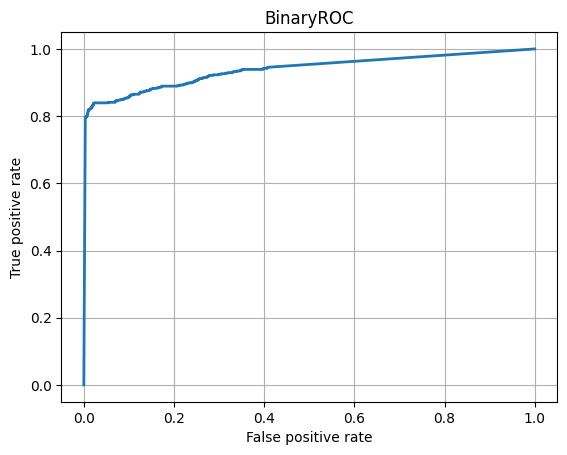

In [252]:
roc_curve = BinaryROC()
roc_curve.update(t,test_labels.int())
roc_curve.plot()

In [239]:
np.mean(test_labels.cpu().numpy(), axis=0)


array([0.05779221], dtype=float32)

<Axes: xlabel='id', ylabel='Proportion'>

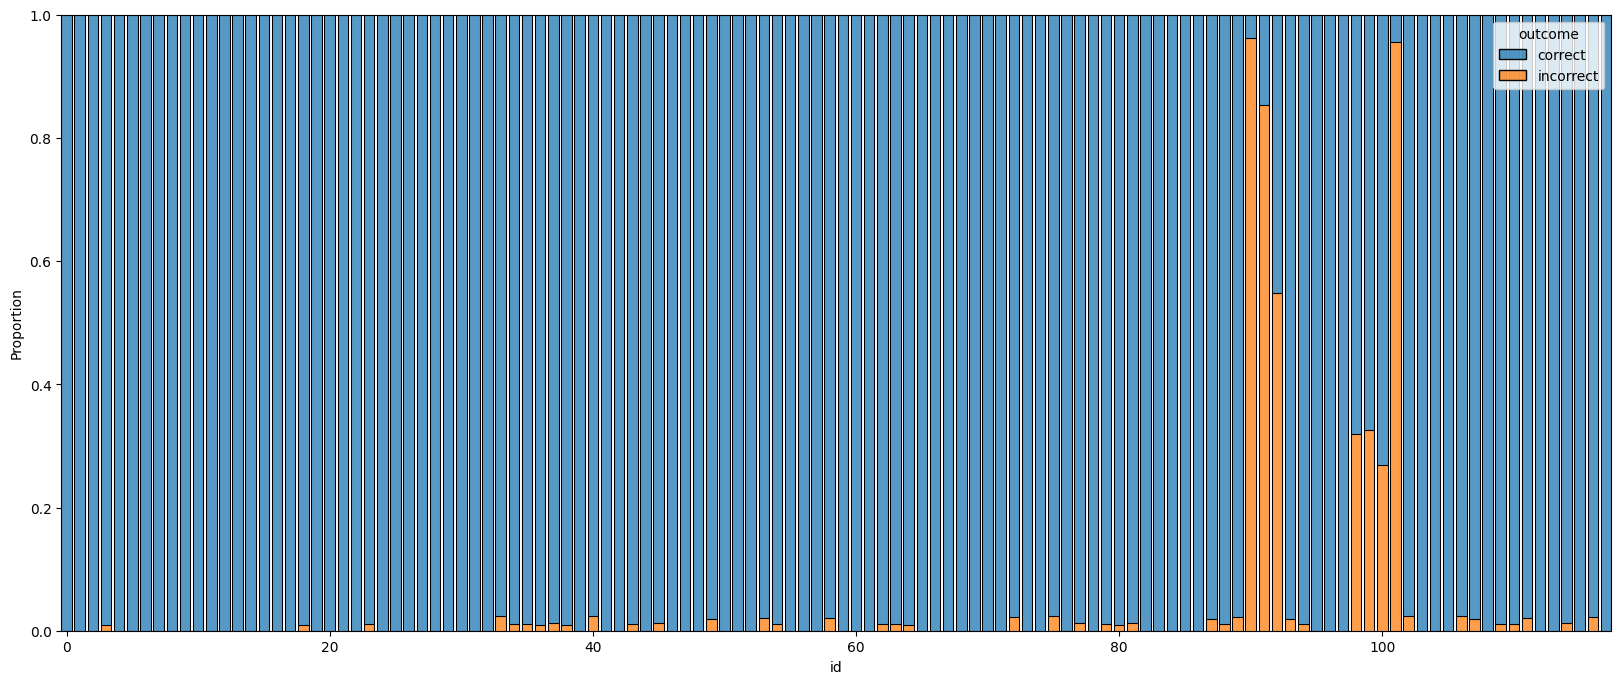

In [236]:
plt.figure(figsize=(20, 8))
sns.histplot(
    data=df,
    x="id", hue="outcome",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8
)

In [202]:
t_bool.shape[0]

623

In [158]:
torch.where(test_labels == 1)[0][:10]

tensor([ 24,  37,  53,  60,  73,  94, 167, 181, 203, 205], device='cuda:0')

In [178]:
z = 73
torch.where(test_inputs[z,:] == 0)

(tensor([ 90, 208], device='cuda:0'),)

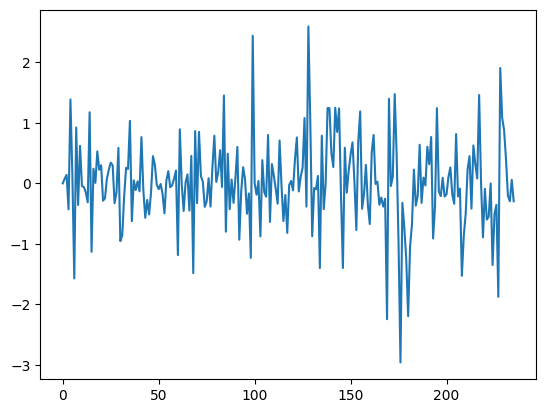

In [176]:
plt.plot(test_inputs[z,:].cpu().numpy())


In [177]:
net.load_state_dict(torch.load('final_model.pth'))
net.eval()
with torch.no_grad():
    t = net(test_inputs[[z],:])
print(t)


net.load_state_dict(torch.load('best_model.pth'))
net.eval()
with torch.no_grad():
    t = net(test_inputs[[z],:])
print(t)

tensor([[1.]], device='cuda:0')
tensor([[0.9562]], device='cuda:0')


In [143]:
i = idxs[2]
i2 = i + test_inputs.shape[1]//2

np.random.seed(41)
# fake = np.random.randn(1,test_inputs.shape[1])
fake = np.ones((1,test_inputs.shape[1]))
fake[:,[i,i2]] = 0
fake = torch.from_numpy(fake).float().to(device)

In [144]:
net.load_state_dict(torch.load('final_model.pth'))
net.eval()
with torch.no_grad():
    t = net(fake)
print(t)


net.load_state_dict(torch.load('best_model.pth'))
net.eval()
with torch.no_grad():
    t = net(fake)
print(t)

tensor([[0.]], device='cuda:0')
tensor([[0.]], device='cuda:0')


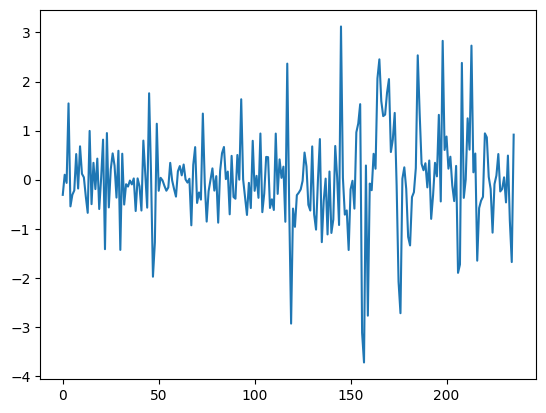

In [65]:
plt.plot(o.T)

In [71]:
x4_relu.shape

(1, 472)

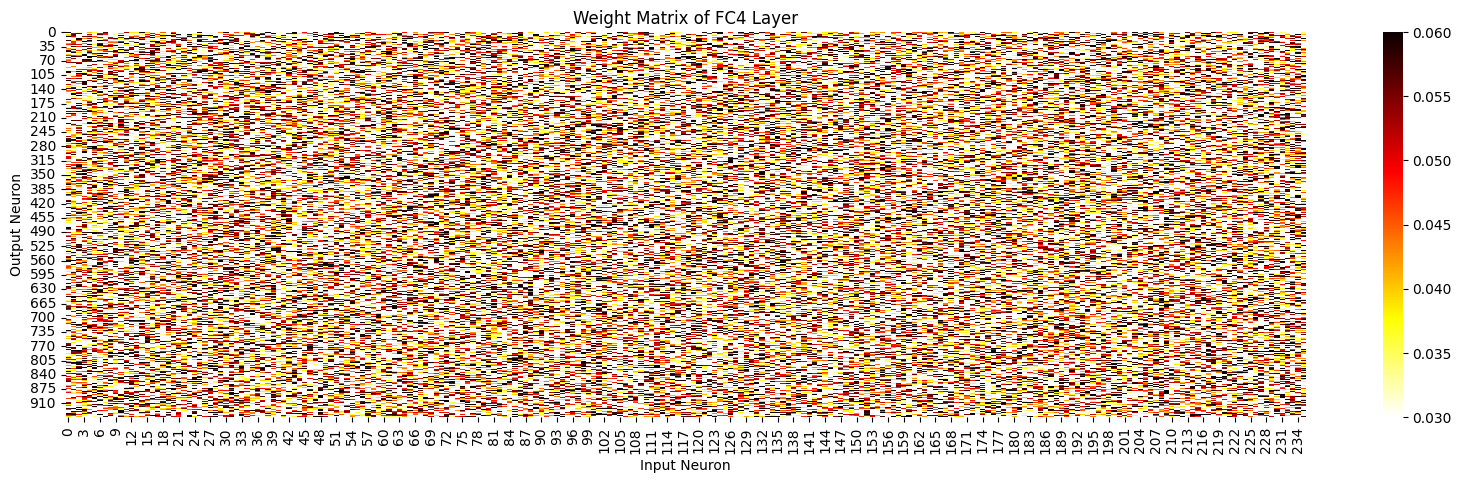

In [89]:
plt.figure(figsize=(20, 5))
q = w1
sns.heatmap(np.abs(q), cmap='hot_r', cbar=True ,vmin=0.03, vmax=.06)
plt.xlabel('Input Neuron')
plt.ylabel('Output Neuron')
plt.title('Weight Matrix of FC4 Layer')
plt.show()

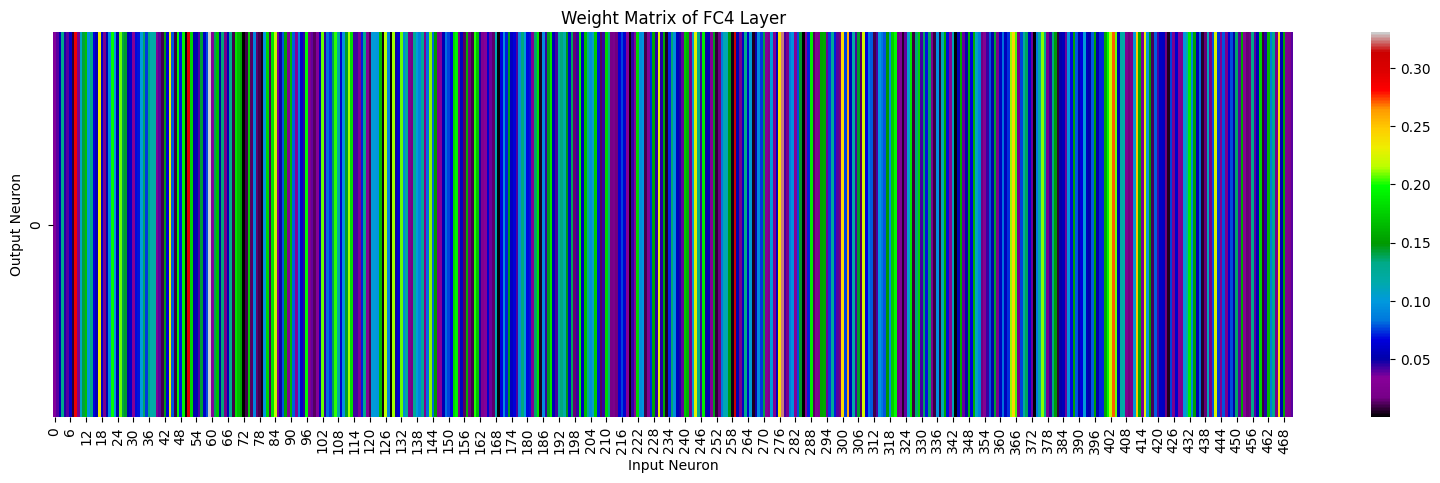

In [76]:
plt.figure(figsize=(20, 5))
sns.heatmap(np.abs(x4), cmap='nipy_spectral', cbar=True)
plt.xlabel('Input Neuron')
plt.ylabel('Output Neuron')
plt.title('Weight Matrix of FC4 Layer')
plt.show()


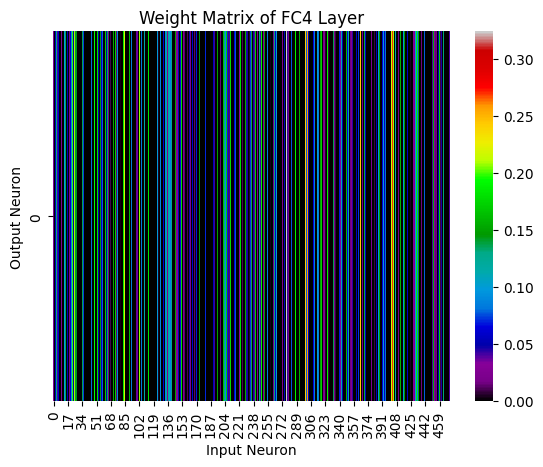

In [72]:

sns.heatmap(x4_relu, cmap='nipy_spectral', cbar=True)
plt.xlabel('Input Neuron')
plt.ylabel('Output Neuron')
plt.title('Weight Matrix of FC4 Layer')
plt.show()


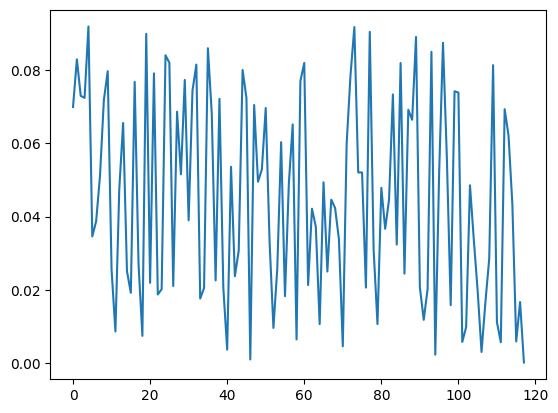

In [37]:
plt.plot(f)